In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
path_strategy_A = "dark_patch_month/zcat/"
path_strategy_B = "dark_patch_semester/zcat/"
zcat_A = glob.glob(path_strategy_A+"/*_zcat.fits")
zcat_A.sort()
zcat_B = glob.glob(path_strategy_B+"/*_zcat.fits")
zcat_B.sort()

In [5]:
def count_targets(zcat_filename):
    zcat = Table.read(zcat_filename)
    is_LRG = (zcat['SPECTYPE']=='GALAXY') & (zcat['Z']==0.7)
    is_ELG = (zcat['SPECTYPE']=='GALAXY') & (zcat['Z']==1.5)
    is_tracer_QSO = (zcat['SPECTYPE']=='QSO') & (zcat['Z']==2.0)
    is_lya_QSO = (zcat['SPECTYPE']=='QSO') & (zcat['Z']==3.0)
    del zcat
    return {'n_ELG':np.count_nonzero(is_ELG),
            'n_tracer_QSO':np.count_nonzero(is_tracer_QSO),
            'n_lya_QSO':np.count_nonzero(is_lya_QSO),
            'n_LRG':np.count_nonzero(is_LRG)}

In [6]:
def get_strategy_count(zcat_files):
    counts = {'n_ELG':[0] , 'n_tracer_QSO':[0], 'n_lya_QSO':[0], 'n_LRG':[0]}
    n_files = len(zcat_files)
    for i in range(n_files):
        print(i, n_files)
        c = count_targets(zcat_files[i])
        for k in c.keys():
            counts[k].append(c[k])
    return counts

In [59]:
counts_A = get_strategy_count(zcat_A)
counts_B = get_strategy_count(zcat_B)

0 35
1 35
2 35
3 35
4 35
5 35
6 35
7 35
8 35
9 35
10 35
11 35
12 35
13 35
14 35
15 35
16 35
17 35
18 35
19 35
20 35
21 35
22 35
23 35
24 35
25 35
26 35
27 35
28 35
29 35
30 35
31 35
32 35
33 35
34 35
0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9


In [68]:
counts_A['n_lya_QSO']

[0,
 1701,
 2313,
 7174,
 15010,
 20956,
 23945,
 25288,
 27851,
 30004,
 36436,
 45103,
 48768,
 52576,
 55450,
 55450,
 55941,
 56475,
 62246,
 65332,
 67777,
 71387,
 72565,
 72880,
 72897,
 74009,
 76574,
 78345,
 78853,
 79401,
 80043,
 80286,
 80335,
 80378,
 80436,
 80446]

In [71]:
for k in counts_A.keys():
    counts_A[k] = np.array(counts_A[k])
    counts_B[k] = np.array(counts_B[k])


0 n_ELG
1 n_LRG
2 n_tracer_QSO
3 n_lya_QSO


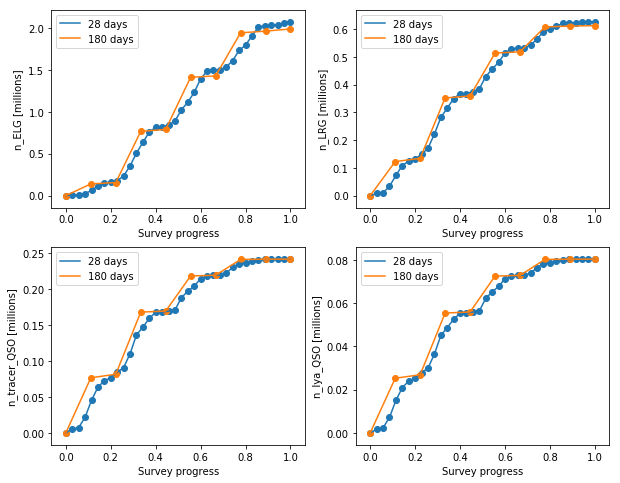

In [86]:
plt.figure(figsize=(10,8))

tracers = ['n_ELG', 'n_LRG', 'n_tracer_QSO', 'n_lya_QSO']

for i,tracer in enumerate(tracers):
    print(i, tracer)
    plt.subplot(2,2,i+1)
    plt.plot(np.linspace(0,1,len(counts_A[tracer])), counts_A[tracer]/1E6, label='28 days')
    plt.plot(np.linspace(0,1,len(counts_B[tracer])), counts_B[tracer]/1E6, label='180 days')
    plt.scatter(np.linspace(0,1,len(counts_A[tracer])), counts_A[tracer]/1E6)
    plt.scatter(np.linspace(0,1,len(counts_B[tracer])), counts_B[tracer]/1E6)
    plt.legend()
    plt.ylabel(tracer+' [millions]')
    plt.xlabel('Survey progress')


In [7]:
path_strategy_A = "dark_global_month/zcat/"
path_strategy_B = "dark_global_semester/zcat/"
zcat_A = glob.glob(path_strategy_A+"/*_zcat.fits")
zcat_A.sort()
zcat_B = glob.glob(path_strategy_B+"/*_zcat.fits")
zcat_B.sort()

In [10]:
counts_A = get_strategy_count(zcat_A)
counts_B = get_strategy_count(zcat_B)

0 13
1 13
2 13
3 13
4 13
5 13
6 13
7 13
8 13
9 13
10 13
11 13
12 13
0 2
1 2


In [12]:
for k in counts_A.keys():
    counts_A[k] = np.array(counts_A[k])
    counts_B[k] = np.array(counts_B[k])


0 n_ELG
1 n_LRG
2 n_tracer_QSO
3 n_lya_QSO


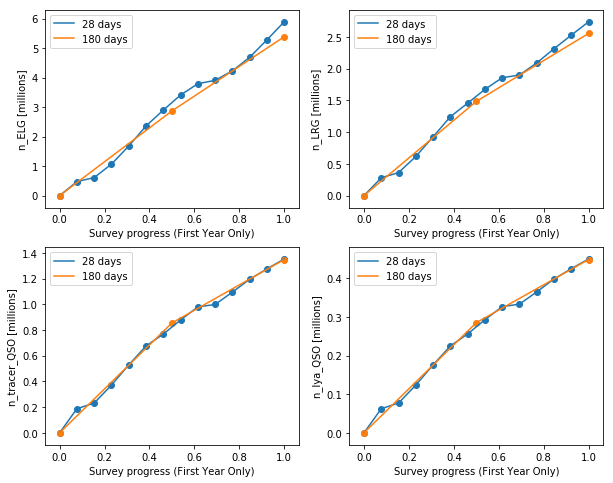

In [14]:
plt.figure(figsize=(10,8))

tracers = ['n_ELG', 'n_LRG', 'n_tracer_QSO', 'n_lya_QSO']

for i,tracer in enumerate(tracers):
    print(i, tracer)
    plt.subplot(2,2,i+1)
    plt.plot(np.linspace(0,1,len(counts_A[tracer])), counts_A[tracer]/1E6, label='28 days')
    plt.plot(np.linspace(0,1,len(counts_B[tracer])), counts_B[tracer]/1E6, label='180 days')
    plt.scatter(np.linspace(0,1,len(counts_A[tracer])), counts_A[tracer]/1E6)
    plt.scatter(np.linspace(0,1,len(counts_B[tracer])), counts_B[tracer]/1E6)
    plt.legend()
    plt.ylabel(tracer+' [millions]')
    plt.xlabel('Survey progress (First Year Only)')
